# Demo de Algortimos de Inducción identificar clases


1) Cargar librerías:

In [1]:
#@title Librerías a usar
import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print("Librerías cargadas")

Librerías cargadas


2) Cargar los datos:

In [2]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoIA/datos/'  #@param {type:"string"}


Mounted at /content/gdrive


In [3]:
## selección de los parámetros

def cargarNombreClases(path, archivo_datos, atributo_clase, nombre_clases):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return atributo_clase, nombre_clases

#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'IRIS.csv'  #@param {type:"string"}
#@markdown ### Nombre del atributo clase / objetivo:
atributo_clase = '-' #@param {type:"string"}
#@markdown ### Descripción de los valores del atributo clase / objetivo:  (nota: siempre debe comienzar en 0, por lo que si no tiene valor 0, agregar "na")
nombre_clases = '-' #@param {type:"string"}
#@markdown ### Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   90#@param {type:"integer"}

## aplicación de los parámetros elegidos

if atributo_clase == '' or  atributo_clase == '-':
  # trata de obtener la configuración del archivo asociado
  atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos, atributo_clase, nombre_clases)

# define nombre atributo de CLASE para ejemplo IRIS
ClassAttributeName = atributo_clase

# define valores de clases para ejemplo IRIS
CLASES = [ ]
for val in nombre_clases.split(','):
  CLASES.append( val )


# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100


print("Datos a usar: ", archivo_datos)
print("Atributo clase: ", ClassAttributeName, ": ", CLASES)


> Definición de los valores discretos para la clase cargada de IRIS_nombreClases.txt.

Datos a usar:  IRIS.csv
Atributo clase:  Clase :  ['na', 'Setosa', 'Versicolor', 'Virginica']


In [4]:
#@title Cargar datos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# devuelve listas de columnas numéricas y no numéricas
def devolNombreColumnas(ndf):
  colValues = []
  for col in ndf.columns:
      colValues.append( col )
  return colValues

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos)

# controla que exista el atributo_clase
if atributo_clase not in df:
  raise ValueError("El atributo '" + atributo_clase + "' no existe en los datos cargados!!!")

# asignar valores discretos para Atributo Clase
if len(CLASES) > 0:
  print("> Actualizando valores del atributo clase: ", atributo_clase, "")
  i = 0
  for val in CLASES:
    df[ClassAttributeName] = df[ClassAttributeName].replace(i, str(val).strip())
    i = i + 1

else:
  print("No se aplica la actualización de los valores del atributo clase: ", atributo_clase, ".")


print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())

# genera los datos solo con la clase para entrenar y probar
Y = np.array(df.pop(ClassAttributeName))
X = np.array(df)

# determina el nombre de las columnas
atributos_entrada = devolNombreColumnas(df)


> Actualizando valores del atributo clase:  Clase 

> Cabecera: 
   LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo   Clase
0          5.1          3.5          1.4          0.2  Setosa
1          4.9          3.0          1.4          0.2  Setosa
2          4.7          3.2          1.3          0.2  Setosa
3          4.6          3.1          1.5          0.2  Setosa
4          5.0          3.6          1.4          0.2  Setosa

> Características: 
       LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo
count   150.000000   150.000000   150.000000   150.000000
mean      5.843333     3.054000     3.758667     1.198667
std       0.828066     0.433594     1.764420     0.763161
min       4.300000     2.000000     1.000000     0.100000
25%       5.100000     2.800000     1.600000     0.300000
50%       5.800000     3.000000     4.350000     1.300000
75%       6.400000     3.300000     5.100000     1.800000
max       7.900000     4.400000     6.900000     2.500000


In [5]:
 #@title Preparar datos

# separa al azar usando muestreo estratificado con proporción indicada
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain), stratify=Y)


print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for i in CLASES:
  cant = 0
  for y in y_train:
    if i == y: cant = cant + 1
  print("    ", i, ":", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for i in CLASES:
  cant = 0
  for y in y_test:
    if i == y: cant = cant + 1
  print("    ", i, ":", cant)



> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (135, 4)
 - y_train (cant):  135
     na : 0
     Setosa : 45
     Versicolor : 45
     Virginica : 45

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (15, 4)
 - y_test (cant):  15
     na : 0
     Setosa : 5
     Versicolor : 5
     Virginica : 5


3) Aplicar Algorirtmo de Inducción:

In [6]:
#@title Aplicar Descubrimiento de Reglas

# genera el árbol y lo muestra
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# muestra las reglas
r = tree.export_text(clf, feature_names= list(atributos_entrada))
print(r)



|--- AnchoPetalo <= 0.80
|   |--- class: Setosa
|--- AnchoPetalo >  0.80
|   |--- AnchoPetalo <= 1.65
|   |   |--- LargoPetalo <= 4.95
|   |   |   |--- class: Versicolor
|   |   |--- LargoPetalo >  4.95
|   |   |   |--- LargoSepalo <= 6.15
|   |   |   |   |--- AnchoPetalo <= 1.55
|   |   |   |   |   |--- class: Virginica
|   |   |   |   |--- AnchoPetalo >  1.55
|   |   |   |   |   |--- class: Versicolor
|   |   |   |--- LargoSepalo >  6.15
|   |   |   |   |--- class: Virginica
|   |--- AnchoPetalo >  1.65
|   |   |--- LargoPetalo <= 4.85
|   |   |   |--- AnchoSepalo <= 3.10
|   |   |   |   |--- class: Virginica
|   |   |   |--- AnchoSepalo >  3.10
|   |   |   |   |--- class: Versicolor
|   |   |--- LargoPetalo >  4.85
|   |   |   |--- class: Virginica



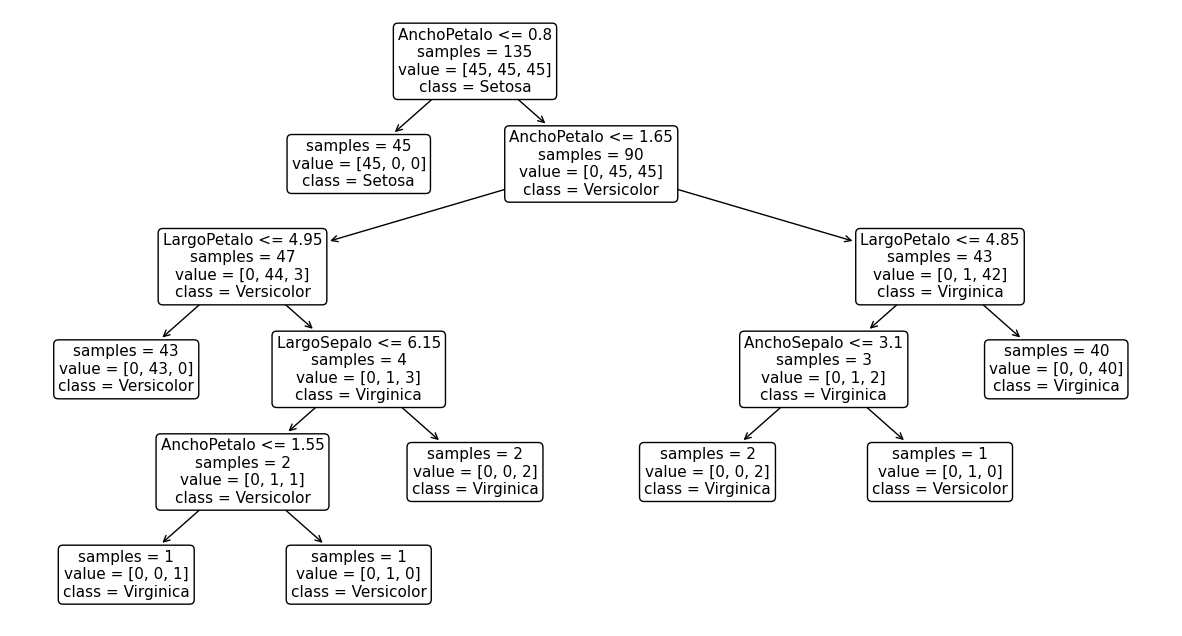

In [7]:
#@title Mostrar Árbol de Decisión

# muestra el árbol
plt.figure(figsize=(15,8))
tree.plot_tree(clf,
              feature_names=atributos_entrada,
              class_names=np.unique(y_train),
              impurity=False,
              rounded=True,
              fontsize=11)
plt.show()


4) Probar las reglas:

*** Resultados con datos de Entrenamiento: 
Real: Virginica / Regla: Virginica: ok
Real: Setosa / Regla: Setosa: ok
Real: Setosa / Regla: Setosa: ok
Real: Virginica / Regla: Virginica: ok
Real: Setosa / Regla: Setosa: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Setosa / Regla: Setosa: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Reg

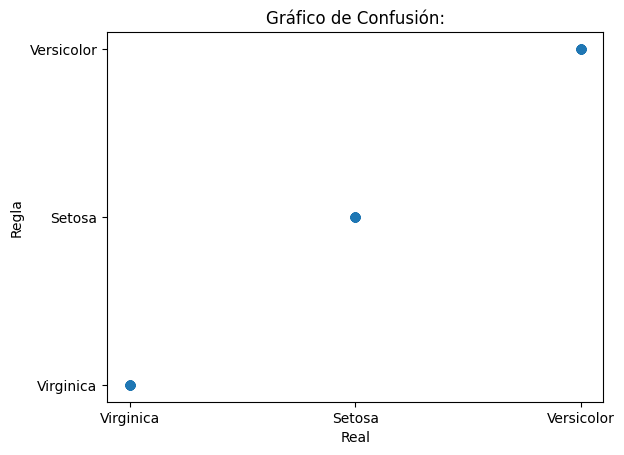

In [8]:
#@title Probar red entrenada con datos de entrenamiento
# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, clases_map):

    # procesa las imágenes de prueba con el modelo
    predClass = clf.predict(x)

    # muestra los resultados con las imágenes
    classPreds = []
    classReal = []
    for i in range(len(x)):

        # prepara salida
        clReal = y[i]
        clPred = predClass[i]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = 'Real: ' + clReal + ' / Regla: '
        strTitulo = strTitulo + clPred
        strTitulo = strTitulo + ": " + ("ok" if (clPred==clReal) else "error!")

        # muestra comparación con la imagen
        print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds))

    # muestra matriz de confusion
    print('\nMatriz de Confusión: ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm,
        index=['r:{:}'.format(x) for x in clases_map],
        columns=['p:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    print(cmtx)
    print("\n")

    # gráfico de comparación
    plt.title('Gráfico de Confusión:')
    plt.xlabel('Real')
    plt.ylabel('Regla')
    plt.scatter(classReal, classPreds)

# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, CLASES)




*** Resultados con datos de Prueba: 
Real: Setosa / Regla: Setosa: ok
Real: Setosa / Regla: Setosa: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Virginica / Regla: Virginica: ok
Real: Virginica / Regla: Virginica: ok
Real: Virginica / Regla: Virginica: ok
Real: Versicolor / Regla: Virginica: error!
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Versicolor / Regla: Versicolor: ok
Real: Setosa / Regla: Setosa: ok
Real: Virginica / Regla: Virginica: ok
Real: Virginica / Regla: Virginica: ok
Real: Setosa / Regla: Setosa: ok
Real: Setosa / Regla: Setosa: ok

 Reporte de Clasificación: 
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         5
  Versicolor       1.00      0.80      0.89         5
   Virginica       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93     

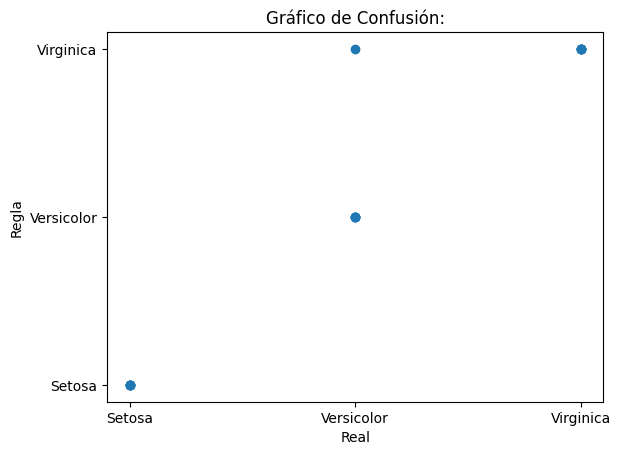

In [9]:
 #@title Probar red entrenada con datos de prueba
 # evalua al modelo entrenado

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, CLASES)